In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [14]:
br,lr = pd.read_csv("/content/drive/My Drive/amazon_reviews/beauty_reviews.csv",low_memory=False),\
pd.read_csv("/content/drive/My Drive/amazon_reviews/luxurybeauty_reviews.csv",low_memory=False,thousands=',')
bm,lm = pd.read_csv("/content/drive/My Drive/amazon_reviews/beauty_metadata.csv",low_memory=False),\
pd.read_csv("/content/drive/My Drive/amazon_reviews/luxurybeauty_metadata.csv",low_memory=False)

In [15]:
lr['reviewTime'] = [datetime.strptime(i, '%m %d, %Y').strftime('%Y-%m-%d') for i in lr.reviewTime]
br['reviewTime'] = [datetime.strptime(i, '%Y-%m-%d').strftime('%Y-%m-%d') for i in br.reviewTime]
# lr['vote'] = lr['vote'].replace(",","").astype(float)

In [16]:
display(br.head())
lr = lr[list(br.columns)]
display(lr.head())

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,style
0,1,True,2015-02-19,A1V6B6TNIC10QE,0143026860,great,One Star,NaN,NaN
1,4,True,2014-12-18,A2F5GHSXFQ0W6J,0143026860,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,NaN,NaN
2,4,True,2014-08-10,A1572GUYS7DGSR,0143026860,"This book was very informative, covering all a...",Worth the Read,NaN,NaN
3,5,True,2013-03-11,A1PSGLFK1NSVO,0143026860,I am already a baseball fan and knew a bit abo...,Good Read,NaN,NaN
4,5,True,2011-12-25,A6IKXKZMTKGSC,0143026860,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",5.0,NaN


,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,style
0,2.0,True,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,3.0,NaN
1,5.0,True,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.,14.0,NaN
2,5.0,True,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Great hand lotion,Five Stars,NaN,{'Size:': ' 3.5 oz.'}
3,5.0,True,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars,NaN,{'Size:': ' 3.5 oz.'}
4,5.0,True,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,NaN,{'Size:': ' 3.5 oz.'}


In [18]:
# br.dtypes

In [17]:
display(bm.head())
lm = lm[list(bm.columns)]
display(lm.head())

,title,brand,rank,asin,description,also_view,also_buy,price,similar_item
0,Workout Headphones by Arena Essentials,HarperCollins,3235148.0,0061073717,NaN,NaN,NaN,NaN,NaN
1,Black Diamond,Swedish Beauty,1462563.0,0143026860,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN
2,"12 Pc BLUE HEAVEN KAJAL""HERBAL kajal With VITA...",BLUE HEAVE,100425.0,014789302X,"['A brand-new, unused, unopened, undamaged ite...","['B00OWT3W28', 'B0796RMSV8', 'B010E1X15K', 'B0...","['B00OWT3W28', 'B010E1X15K', 'B0796RMSV8', 'B0...",6.45,NaN
3,The Inheritance,Sunatoria,476831.0,0571348351,"[""You have to wonder why there isn't a word in...","['0571352367', '0573697094', '1635571766', '15...","['1848426380', 'B07JVF7M3C', '1644450003', '16...",NaN,NaN
4,The Listening Cards,Listening Planet,2967592.0,0692508988,['The Listening Cards are an eloquent primer i...,NaN,NaN,NaN,NaN


,title,brand,rank,asin,description,also_view,also_buy,price,similar_item
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,NaN,"4,324 in Beauty & Personal Care (",B00004U9V2,['After a long day of handling thorny situatio...,"['B00FRERO7G', 'B00GHX7H0A', 'B07GFHJRMX', 'B0...","['B00GHX7H0A', 'B00FRERO7G', 'B00R68QXCS', 'B0...",$30.00,NaN
1,AHAVA Bath Salts,NaN,"1,633,549 in Beauty & Personal Care (",B0000531EN,"[""If you haven't experienced the pleasures of ...",[],[],NaN,NaN
2,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",NaN,"1,806,710 in Beauty &amp; Personal Care (",B0000532JH,"[""Rich, black mineral mud, harvested from the ...",[],[],NaN,NaN
3,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",NaN,[],B00005A77F,['This liquid soap with convenient pump dispen...,"['B00004U9V2', 'B00GHX7H0A', 'B00FRERO7G', 'B0...",[],$15.99,NaN
4,Soy Milk Hand Crme,NaN,"42,464 in Beauty &amp; Personal Care (",B00005NDTD,"[""Remember why you love your favorite blanket?...",[],"['B000NZT6KM', 'B001BY229Q', 'B008J724QY', 'B0...",$18.00,NaN


In [19]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
lr[lr["vote"].isna()][["reviewText"]].head(10)

,reviewText
2,Great hand lotion
3,This is the best for the severely dry skin on my hands
4,The best non- oily hand cream ever. It heals overnight.
5,Ive used this lotion for many years. I try others occasionally and always come back to Gardners. Please don't change a thing.
6,Works great for dry hands.
7,The best hand cream ever.
8,LOVE THIS SCENT!! But Crabtree and Evelyn make so many. Washes off easily too!!
9,Its a great moisturizer especially for gardners
10,This hand cream is the best! Have been using it for years. Keeps my hands soft all day
11,I am a healthcare care professional that suffers from dry hands. This hand lotion has changed my life. I keep it on the desk nearby. The hand therapy instantly improves the discomfort from dry hands.


In [20]:
# display(beauty[beauty["vote"]==0]) 
# display(luxury[luxury["vote"]==0]) 
# beauty['vote'] = beauty['vote'].fillna(0)
# luxury['vote'] = luxury['vote'].fillna(0)

#What proportion of the dataset does it represents?
print('We have', len(br), 'reviews in the dataset and', 
      str(round((1 - len(br.dropna(subset=['vote']))/len(br))*100, 2)) + '%', 
      'are missing the vote value.')
print('It means that we will be working on', str(round(len(br.dropna(subset=['vote']))/len(br)*100, 2)) 
      + '%', 'of the dataset, that is', int(len(br.dropna(subset=['vote']))/len(br)*len(br)),
      'reviews.')

print('We have', len(lr), 'reviews in the dataset and', 
      str(round((1 - len(lr.dropna(subset=['vote']))/len(lr))*100, 2)) + '%', 
      'are missing the vote value.')
print('It means that we will be working on', str(round(len(lr.dropna(subset=['vote']))/len(lr)*100, 2)) 
      + '%', 'of the dataset, that is', int(len(lr.dropna(subset=['vote']))/len(lr)*len(lr)),
      'reviews.')

We have 371345 reviews in the dataset and 86.02% are missing the vote value.
It means that we will be working on 13.98% of the dataset, that is 51899 reviews.
We have 574628 reviews in the dataset and 81.96% are missing the vote value.
It means that we will be working on 18.04% of the dataset, that is 103689 reviews.


In [21]:
br = br.dropna(subset=['vote'])
lr = lr.dropna(subset=['vote'])

br = br.loc[br.verified, :]
lr = lr.loc[lr.verified, :]

In [22]:
#We want to keep only the reviews that were written maximum 7 days before the max date of the dataset
#We define a date threshold and keep only the reviews written before that threshold
datelim_b = (datetime.strptime(max(br.reviewTime), '%Y-%m-%d') - timedelta(days = 7)).strftime('%Y-%m-%d')

# print('The current max date is', max(combo.reviewTime))
# print('The amount of reviews that were written at least 7 days before that date represents',
#       str(round(len(combo[combo['reviewTime'] < datelim])/len(combo),6)*100) + '% of the dataset, that is',
#       len(combo[combo['reviewTime'] < datelim]), 'reviews.')

datelim_l = (datetime.strptime(max(lr.reviewTime), '%Y-%m-%d') - timedelta(days = 7)).strftime('%Y-%m-%d')

# print('The current max date is', max(combo.reviewTime))
# print('The amount of reviews that were written at least 7 days before that date represents',
#       str(round(len(combo[combo['reviewTime'] < datelim])/len(combo),6)*100) + '% of the dataset, that is',
#       len(combo[combo['reviewTime'] < datelim]), 'reviews.')

print("Beauty " + datelim_b) 
print("Luxury " + datelim_l)

Beauty 2018-09-18
Luxury 2018-08-22


In [23]:
br = br[br['reviewTime'] < datelim_b]
lr = lr[lr['reviewTime'] < datelim_b]

In [24]:
br[['vote_stan']] = StandardScaler().fit_transform(br[['vote']])
lr[['vote_stan']] = StandardScaler().fit_transform(lr[['vote']])

br[['vote_norm']] = MinMaxScaler().fit_transform(br[['vote']])
lr[['vote_norm']] = MinMaxScaler().fit_transform(lr[['vote']])

In [25]:
reviews = pd.concat([br, lr], axis = 0)

In [26]:
print('We have', str(round((1 - len(reviews.drop_duplicates(subset=['reviewerID', 'asin', 'reviewText']))\
                            /len(reviews))*100,2))
      + '%', 'duplicate reviews in the dataset.')
print('We will remove them, meaning that our dataset contains now', 
      len(reviews.drop_duplicates(subset=['reviewerID', 'asin', 'reviewText'])), 'reviews.')

We have 5.18% duplicate reviews in the dataset.
We will remove them, meaning that our dataset contains now 121212 reviews.


In [27]:
reviews = reviews.sort_values(by="vote",ascending=False).drop_duplicates(subset=['reviewerID', 'asin', 'reviewText'])

In [ ]:
# reviews[["vote_stan"]].nlargest(20, ['vote_stan'])

121212
120879


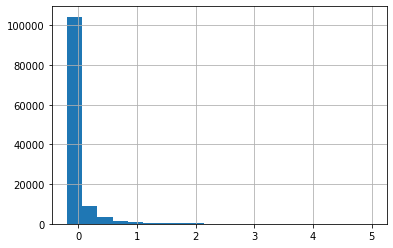

In [28]:
# hist_df = combo.loc[~(combo["vote"]==0)]
hist_df = reviews.loc[~(reviews["vote_stan"]>5)]
print(len(reviews))
print(len(hist_df))
hist_df.vote_stan.hist(bins=20)
# combo.vote.hist(bins=3)

121212
121185


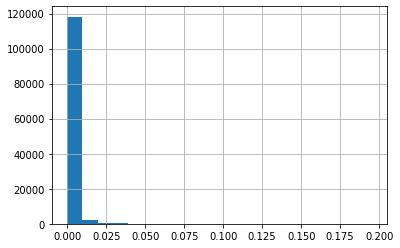

In [29]:
# hist_df = combo.loc[~(combo["vote"]==0)]
hist_df = reviews.loc[~(reviews["vote_norm"]>.2)]
print(len(reviews))
print(len(hist_df))
hist_df.vote_norm.hist(bins=20)
# combo.vote.hist(bins=3)

In [30]:
reviews['sentiment'] = np.where(reviews['overall']>=4, 1, np.nan)
reviews['neg'] = np.where(reviews['overall']<=1, 0, np.nan)
reviews['sentiment'] = reviews['sentiment'].fillna(reviews.neg)
reviews = reviews.drop(['neg'], axis = 1)

In [36]:
reviews.to_csv('reviews_cleaned.csv', index = False)

In [ ]:
# beauty = pd.merge(bm,br,how='inner',left_on=["asin"],right_on=["asin"])
# luxury = pd.merge(lm,lr,how='inner',left_on=["asin"],right_on=["asin"])